In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
from IPython.display import display
from ipywidgets import interact, interact_manual
import re

In [2]:
df = pd.read_excel('Bank_Data.xlsx')
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## Methods for Setting Header for the Dataset

In [3]:
df1 = pd.read_excel('Bank_Data.xlsx', header=2)
df1

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

# Experts Methods

In [5]:
df = pd.read_excel('Bank_Data.xlsx',skiprows=2)

In [6]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

In [8]:
df.describe()

,customerid,age,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [9]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

# Salary conversion from object to int

In [10]:
np.NaN
np.NAN
np.nan

nan

In [11]:
df['salary'] = df['salary'].replace('?',np.nan)

In [12]:
df['salary'] = df['salary'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45149 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [14]:
df.isnull().sum()

customerid     0
age           20
salary        62
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

### jobedu column to education and job_role

In [15]:
df['jobedu']

0           management,tertiary
1          technician,secondary
2        entrepreneur,secondary
3           blue-collar,unknown
4               unknown,unknown
                  ...          
45206       technician,tertiary
45207           retired,primary
45208         retired,secondary
45209     blue-collar,secondary
45210    entrepreneur,secondary
Name: jobedu, Length: 45211, dtype: object

In [16]:
job = []
edu = []
for val in df['jobedu']:
    job.append(val.split(',')[0])
    edu.append(val.split(',')[1])

In [17]:
job

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'management',
 'management',
 'entrepreneur',
 'retired',
 'technician',
 'admin.',
 'admin.',
 'technician',
 'technician',
 'services',
 'retired',
 'admin.',
 'blue-collar',
 'retired',
 'services',
 'blue-collar',
 'management',
 'blue-collar',
 'services',
 'retired',
 'admin.',
 'management',
 'entrepreneur',
 'management',
 'technician',
 'technician',
 'management',
 'admin.',
 'blue-collar',
 'management',
 'technician',
 'blue-collar',
 'technician',
 'admin.',
 'admin.',
 'services',
 'management',
 'blue-collar',
 'retired',
 'retired',
 'admin.',
 'self-employed',
 'technician',
 'technician',
 'management',
 'blue-collar',
 'management',
 'management',
 'admin.',
 'technician',
 'entrepreneur',
 'management',
 'blue-collar',
 'blue-collar',
 'services',
 'admin.',
 'technician',
 'blue-collar',
 'services',
 'blue-collar',
 'management',
 'retired',
 'management',
 'technician',
 'blue-collar',
 '

In [18]:
edu

['tertiary',
 'secondary',
 'secondary',
 'unknown',
 'unknown',
 'tertiary',
 'tertiary',
 'tertiary',
 'primary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unknown',
 'secondary',
 'primary',
 'unknown',
 'primary',
 'primary',
 'secondary',
 'secondary',
 'tertiary',
 'primary',
 'secondary',
 'primary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unknown',
 'secondary',
 'unknown',
 'primary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'tertiary',
 'unknown',
 'unknown',
 'primary',
 'tertiary',
 'secondary',
 'primary',
 'secondary',
 'unknown',
 'tertiary',
 'tertiary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'primary',
 'secondary',
 'seco

In [19]:
df['job_role']= df['jobedu'].apply(lambda x:x.split(',')[0])
df['education']= df['jobedu'].apply(lambda x:x.split(',')[1])

In [20]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,...,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,...,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,...,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,...,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Removal of column jobedu

In [21]:
#df.drop()
#df.drop(['jobedu'], axis=1)
del df['jobedu']
del df['customerid']

In [22]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [23]:
df['month']

0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45211, dtype: object

In [24]:
df['month'] = df['month'].apply(lambda x:re.findall(r'(\w+)\,', str(x)))

In [25]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,[may],261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,[may],151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,[may],76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,[may],92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,[may],198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,[nov],16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,[nov],7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,[nov],18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,[nov],8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [26]:
df['month'] = df['month'].astype(str).str.replace('[', '').str.replace(']', '')

C:\Users\yousu\AppData\Local\Temp/ipykernel_1484/3818158431.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['month'] = df['month'].astype(str).str.replace('[', '').str.replace(']', '')


In [27]:
df['month'] = df['month'].str.strip("'")

In [28]:
df['duration'].apply(lambda x:re.findall(r'\d+', x))

0                      [261]
1                      [151]
2                       [76]
3                       [92]
4                      [198]
                ...         
45206    [16, 2833333333333]
45207                 [7, 6]
45208    [18, 7833333333333]
45209    [8, 46666666666667]
45210    [6, 01666666666667]
Name: duration, Length: 45211, dtype: object

In [29]:
float(df['duration'][0].split()[0])

261.0

In [30]:
# for seconds in to minutes
float(df['duration'][0].split()[0])/60

4.35

In [31]:
# for minutes
round(float(df['duration'][45210].split()[0]),2)

6.02

In [32]:
for val in df['duration']:
    if 'sec' in val:
        print(round(float(val.split()[0])/60),2)
    else:
        print(round(float(val.split()[0]),2))

4 2
3 2
1 2
2 2
3 2
2 2
4 2
6 2
1 2
1 2
4 2
2 2
9 2
1 2
3 2
6 2
2 2
1 2
4 2
1 2
4 2
3 2
3 2
6 2
3 2
3 2
5 2
2 2
4 2
6 2
4 2
4 2
3 2
4 2
6 2
4 2
6 2
28 2
10 2
2 2
3 2
3 2
0 2
25 2
10 2
4 2
6 2
4 2
3 2
6 2
4 2
4 2
3 2
13 2
2 2
3 2
2 2
0 2
3 2
30 2
2 2
14 2
3 2
7 2
6 2
2 2
9 2
5 2
3 2
3 2
4 2
3 2
3 2
5 2
3 2
3 2
4 2
6 2
5 2
3 2
3 2
4 2
0 2
17 2
4 2
9 2
24 2
23 2
3 2
3 2
1 2
4 2
10 2
4 2
3 2
7 2
5 2
2 2
3 2
3 2
4 2
2 2
4 2
1 2
7 2
3 2
3 2
0 2
9 2
14 2
3 2
2 2
4 2
5 2
2 2
4 2
9 2
6 2
3 2
2 2
7 2
1 2
2 2
2 2
3 2
4 2
1 2
1 2
2 2
10 2
11 2
6 2
3 2
2 2
2 2
3 2
2 2
1 2
9 2
9 2
3 2
5 2
1 2
3 2
2 2
1 2
3 2
4 2
3 2
10 2
3 2
10 2
34 2
1 2
2 2
2 2
1 2
4 2
2 2
2 2
2 2
3 2
5 2
9 2
4 2
4 2
2 2
4 2
11 2
4 2
18 2
4 2
4 2
2 2
2 2
7 2
3 2
0 2
8 2
12 2
5 2
11 2
18 2
7 2
2 2
3 2
5 2
2 2
6 2
9 2
3 2
4 2
2 2
1 2
5 2
5 2
4 2
2 2
4 2
1 2
10 2
5 2
8 2
10 2
8 2
6 2
1 2
4 2
7 2
4 2
5 2
4 2
6 2
4 2
5 2
3 2
6 2
7 2
3 2
2 2
6 2
3 2
5 2
2 2
24 2
2 2
4 2
0 2
4 2
2 2
0 2
12 2
12 2
2 2
4 2
1 2
3 2
1 2
3 2
6 2
2 2
12 2
3 2


3 2
14 2
6 2
4 2
1 2
3 2
0 2
4 2
4 2
3 2
2 2
5 2
3 2
3 2
4 2
3 2
2 2
3 2
14 2
6 2
8 2
1 2
16 2
4 2
3 2
1 2
1 2
4 2
2 2
3 2
3 2
2 2
4 2
14 2
12 2
3 2
1 2
7 2
7 2
6 2
2 2
7 2
9 2
2 2
3 2
9 2
2 2
6 2
17 2
9 2
1 2
5 2
4 2
4 2
4 2
2 2
2 2
4 2
6 2
13 2
2 2
1 2
3 2
4 2
4 2
0 2
4 2
3 2
2 2
6 2
3 2
6 2
2 2
3 2
9 2
14 2
1 2
6 2
7 2
2 2
0 2
2 2
16 2
2 2
1 2
1 2
1 2
4 2
6 2
2 2
0 2
6 2
4 2
1 2
2 2
6 2
2 2
15 2
6 2
3 2
5 2
1 2
0 2
10 2
2 2
4 2
4 2
13 2
3 2
5 2
7 2
4 2
12 2
11 2
4 2
4 2
2 2
8 2
2 2
2 2
17 2
3 2
6 2
1 2
7 2
2 2
2 2
1 2
4 2
6 2
5 2
2 2
4 2
11 2
2 2
4 2
4 2
5 2
4 2
6 2
5 2
2 2
3 2
5 2
1 2
6 2
5 2
6 2
3 2
5 2
6 2
9 2
2 2
3 2
5 2
4 2
2 2
1 2
5 2
8 2
3 2
6 2
2 2
4 2
5 2
7 2
3 2
3 2
4 2
2 2
2 2
4 2
0 2
9 2
9 2
3 2
7 2
5 2
5 2
6 2
3 2
3 2
15 2
2 2
5 2
5 2
2 2
9 2
0 2
7 2
2 2
7 2
4 2
7 2
6 2
1 2
4 2
10 2
5 2
3 2
1 2
2 2
3 2
3 2
3 2
2 2
2 2
10 2
1 2
1 2
3 2
5 2
5 2
11 2
6 2
8 2
4 2
4 2
1 2
4 2
12 2
8 2
4 2
6 2
1 2
4 2
4 2
9 2
37 2
2 2
2 2
4 2
4 2
19 2
1 2
1 2
2 2
3 2
24 2
5 2
3 2
4 2
0 2
3 2


1 2
5 2
6 2
4 2
2 2
1 2
1 2
5 2
2 2
1 2
1 2
4 2
1 2
1 2
12 2
2 2
3 2
6 2
18 2
2 2
2 2
3 2
1 2
6 2
7 2
0 2
4 2
6 2
7 2
10 2
4 2
5 2
1 2
11 2
3 2
4 2
22 2
2 2
2 2
3 2
12 2
8 2
8 2
8 2
2 2
5 2
1 2
14 2
7 2
2 2
5 2
5 2
8 2
6 2
3 2
3 2
9 2
8 2
1 2
9 2
6 2
2 2
3 2
3 2
1 2
2 2
4 2
3 2
4 2
2 2
15 2
10 2
7 2
14 2
3 2
4 2
3 2
3 2
3 2
2 2
1 2
2 2
11 2
28 2
23 2
3 2
3 2
5 2
2 2
2 2
10 2
10 2
4 2
6 2
4 2
11 2
4 2
8 2
1 2
14 2
1 2
11 2
7 2
19 2
28 2
4 2
14 2
5 2
2 2
3 2
1 2
1 2
2 2
1 2
5 2
7 2
1 2
3 2
5 2
1 2
8 2
3 2
18 2
3 2
2 2
4 2
7 2
3 2
2 2
4 2
1 2
4 2
3 2
3 2
2 2
4 2
4 2
2 2
3 2
4 2
4 2
2 2
1 2
8 2
3 2
5 2
5 2
3 2
8 2
3 2
2 2
1 2
3 2
5 2
1 2
3 2
0 2
10 2
1 2
4 2
2 2
6 2
2 2
7 2
4 2
3 2
0 2
2 2
6 2
16 2
6 2
3 2
1 2
3 2
6 2
5 2
1 2
1 2
8 2
1 2
2 2
2 2
11 2
3 2
3 2
3 2
16 2
1 2
2 2
5 2
2 2
6 2
1 2
13 2
11 2
7 2
12 2
16 2
3 2
3 2
2 2
0 2
4 2
1 2
1 2
2 2
4 2
19 2
4 2
3 2
3 2
10 2
1 2
3 2
1 2
4 2
1 2
4 2
3 2
12 2
2 2
3 2
4 2
15 2
5 2
2 2
7 2
3 2
4 2
0 2
4 2
3 2
6 2
5 2
11 2
4 2
12 2
3 2
3 2
0 2
3 2


0 2
2 2
2 2
4 2
1 2
6 2
1 2
5 2
9 2
21 2
3 2
6 2
7 2
4 2
3 2
2 2
0 2
3 2
3 2
6 2
3 2
1 2
6 2
10 2
3 2
3 2
5 2
1 2
1 2
8 2
2 2
8 2
3 2
0 2
6 2
2 2
5 2
1 2
4 2
4 2
4 2
4 2
10 2
10 2
4 2
8 2
2 2
3 2
3 2
7 2
1 2
4 2
6 2
2 2
1 2
2 2
4 2
8 2
2 2
4 2
2 2
3 2
1 2
2 2
2 2
6 2
0 2
9 2
3 2
2 2
1 2
9 2
4 2
5 2
2 2
4 2
3 2
4 2
3 2
5 2
1 2
3 2
8 2
2 2
3 2
4 2
2 2
3 2
1 2
2 2
0 2
10 2
2 2
2 2
2 2
3 2
6 2
2 2
1 2
3 2
2 2
6 2
2 2
12 2
6 2
6 2
2 2
10 2
5 2
3 2
2 2
4 2
2 2
9 2
3 2
2 2
1 2
2 2
2 2
3 2
5 2
1 2
1 2
2 2
2 2
3 2
3 2
4 2
2 2
3 2
5 2
2 2
4 2
2 2
6 2
2 2
4 2
20 2
2 2
2 2
1 2
1 2
5 2
2 2
0 2
3 2
9 2
1 2
3 2
3 2
5 2
8 2
6 2
1 2
2 2
3 2
3 2
1 2
3 2
4 2
5 2
1 2
3 2
5 2
3 2
2 2
2 2
1 2
12 2
3 2
12 2
1 2
12 2
1 2
0 2
10 2
6 2
2 2
10 2
6 2
7 2
2 2
1 2
8 2
2 2
7 2
5 2
13 2
2 2
3 2
3 2
4 2
3 2
6 2
2 2
2 2
3 2
1 2
2 2
11 2
6 2
9 2
0 2
9 2
6 2
1 2
2 2
2 2
11 2
1 2
6 2
21 2
10 2
5 2
12 2
5 2
2 2
2 2
2 2
2 2
2 2
7 2
1 2
1 2
6 2
2 2
2 2
1 2
3 2
1 2
6 2
5 2
3 2
4 2
3 2
1 2
2 2
2 2
2 2
7 2
4 2
7 2
3 2
2 2
3 2
2

7 2
1 2
2 2
1 2
4 2
1 2
2 2
9 2
16 2
1 2
3 2
8 2
4 2
3 2
0 2
0 2
2 2
2 2
3 2
3 2
4 2
1 2
4 2
2 2
3 2
4 2
4 2
2 2
2 2
2 2
3 2
6 2
4 2
4 2
4 2
12 2
7 2
3 2
3 2
3 2
3 2
12 2
9 2
19 2
3 2
2 2
2 2
2 2
7 2
16 2
6 2
1 2
2 2
3 2
4 2
3 2
5 2
2 2
6 2
4 2
6 2
5 2
13 2
2 2
1 2
1 2
1 2
3 2
4 2
9 2
8 2
10 2
4 2
6 2
1 2
2 2
2 2
2 2
1 2
2 2
5 2
1 2
1 2
2 2
3 2
1 2
2 2
5 2
2 2
5 2
4 2
2 2
3 2
2 2
3 2
1 2
1 2
1 2
1 2
15 2
1 2
1 2
2 2
10 2
6 2
0 2
8 2
1 2
2 2
7 2
2 2
1 2
0 2
19 2
2 2
1 2
1 2
8 2
5 2
2 2
15 2
1 2
2 2
3 2
8 2
6 2
11 2
0 2
3 2
2 2
4 2
2 2
15 2
6 2
5 2
7 2
3 2
3 2
1 2
2 2
3 2
2 2
2 2
7 2
5 2
4 2
1 2
14 2
10 2
3 2
3 2
1 2
5 2
2 2
5 2
6 2
9 2
2 2
4 2
12 2
4 2
2 2
2 2
12 2
1 2
3 2
5 2
3 2
1 2
1 2
1 2
2 2
3 2
3 2
2 2
5 2
2 2
1 2
0 2
4 2
2 2
10 2
6 2
8 2
2 2
2 2
3 2
7 2
2 2
1 2
1 2
4 2
2 2
1 2
1 2
15 2
1 2
20 2
2 2
6 2
7 2
1 2
2 2
9 2
16 2
1 2
1 2
10 2
16 2
4 2
3 2
1 2
8 2
2 2
16 2
1 2
2 2
2 2
8 2
3 2
1 2
6 2
2 2
4 2
2 2
5 2
4 2
2 2
4 2
4 2
2 2
2 2
3 2
4 2
2 2
11 2
1 2
2 2
4 2
3 2
2 2
2 2
16 2
3 

2 2
3 2
2 2
1 2
5 2
4 2
8 2
14 2
5 2
3 2
2 2
5 2
2 2
6 2
8 2
4 2
4 2
5 2
6 2
4 2
5 2
5 2
4 2
2 2
2 2
1 2
3 2
2 2
2 2
5 2
1 2
5 2
3 2
1 2
6 2
2 2
2 2
4 2
4 2
5 2
2 2
3 2
0 2
3 2
1 2
5 2
2 2
2 2
5 2
0 2
4 2
4 2
4 2
6 2
2 2
1 2
7 2
4 2
1 2
3 2
10 2
6 2
4 2
3 2
4 2
3 2
2 2
9 2
3 2
2 2
0 2
2 2
3 2
4 2
4 2
5 2
1 2
3 2
7 2
7 2
6 2
2 2
1 2
1 2
3 2
4 2
4 2
2 2
6 2
8 2
2 2
7 2
7 2
2 2
13 2
2 2
6 2
6 2
3 2
4 2
5 2
2 2
5 2
1 2
1 2
7 2
12 2
3 2
1 2
4 2
2 2
0 2
3 2
4 2
10 2
4 2
4 2
8 2
9 2
10 2
1 2
5 2
2 2
4 2
3 2
1 2
0 2
3 2
2 2
0 2
3 2
2 2
4 2
4 2
3 2
4 2
4 2
3 2
5 2
6 2
2 2
3 2
4 2
1 2
3 2
8 2
4 2
2 2
1 2
2 2
2 2
4 2
4 2
3 2
0 2
4 2
1 2
2 2
2 2
6 2
3 2
2 2
5 2
3 2
3 2
8 2
7 2
3 2
3 2
3 2
3 2
7 2
2 2
3 2
12 2
9 2
5 2
7 2
1 2
3 2
5 2
1 2
1 2
7 2
1 2
9 2
3 2
2 2
2 2
3 2
2 2
12 2
2 2
12 2
1 2
9 2
6 2
5 2
5 2
2 2
2 2
1 2
4 2
12 2
5 2
4 2
2 2
4 2
2 2
4 2
6 2
3 2
9 2
4 2
4 2
11 2
2 2
4 2
2 2
8 2
2 2
3 2
17 2
4 2
4 2
2 2
4 2
3 2
2 2
2 2
2 2
5 2
1 2
12 2
7 2
2 2
3 2
8 2
3 2
4 2
3 2
2 2
3 2
3 2
10 2
3 2
1 

3.52
5.32
5.2
1.0
1.18
6.1
14.37
1.18
2.87
4.85
1.52
3.95
18.83
9.62
8.48
8.5
4.27
6.05
22.37
8.7
2.8
5.1
5.9
1.77
4.37
1.52
1.45
5.7
9.4
3.02
6.97
3.32
4.18
16.7
13.88
4.57
4.02
9.4
2.2
0.78
5.63
2.12
16.42
3.93
1.12
2.7
2.02
15.48
1.52
0.98
2.1
1.35
12.82
22.67
1.52
18.9
2.88
1.43
2.17
3.47
4.6
1.77
4.18
8.03
0.35
4.0
1.47
2.5
2.78
1.43
1.75
0.57
1.75
9.18
5.37
14.97
3.22
2.95
5.95
6.98
1.3
0.4
2.45
1.67
2.42
3.07
1.85
3.15
5.23
5.37
7.42
1.62
12.03
1.13
2.77
0.73
1.17
1.33
1.2
2.65
2.08
11.87
2.6
3.02
1.42
6.38
1.55
2.53
1.45
0.77
1.13
4.35
3.4
1.7
10.62
2.02
3.97
1.58
2.12
7.0
2.02
0.48
5.2
3.88
0.68
1.27
1.6
22.53
1.63
1.15
0.97
7.3
2.72
2.55
2.32
2.25
1.28
3.52
5.23
4.63
5.73
2.53
17.95
1.2
1.17
2.97
7.08
1.5
1.33
5.12
4.32
2.68
1.1
7.03
3.08
4.25
8.63
2.8
4.25
2.32
8.78
9.33
2.2
11.7
1.35
3.13
6.78
4.23
2.93
1.48
4.47
2.5
6.12
2.53
8.17
25.75
0.67
1.08
0.78
4.57
1.97
1.8
8.67
0.93
1.48
4.55
3.15
1.23
8.08
4.52
1.92
1.18
9.98
4.12
3.58
1.47
7.05
4.75
0.37
3.33
4.1
5.87
3.13
8.43


10.78
1.6
7.63
3.75
1.72
1.87
2.42
2.38
3.6
2.6
0.87
2.57
19.42
1.95
4.43
1.78
8.1
1.2
1.05
1.67
2.9
1.03
0.78
1.72
1.58
3.88
1.82
5.7
1.07
1.4
1.48
26.12
0.68
1.12
2.55
2.33
5.58
4.1
12.33
1.43
1.42
0.58
1.73
1.5
2.48
1.42
5.83
9.0
1.92
1.82
9.92
2.58
4.63
4.03
4.8
2.72
5.65
1.02
0.48
4.07
2.05
5.87
1.2
1.72
1.88
2.88
3.12
2.8
0.83
3.18
2.55
0.37
2.03
4.18
1.58
0.82
1.57
3.45
2.03
1.47
1.6
1.67
12.68
1.62
10.63
2.37
11.58
2.25
4.48
5.9
2.82
4.18
12.73
4.18
0.38
2.02
1.67
3.07
3.0
2.52
2.17
5.0
1.17
1.13
2.35
2.17
1.25
1.02
1.58
20.98
5.93
2.23
5.18
2.62
1.48
3.98
44.87
1.95
2.02
11.25
5.52
1.72
3.83
1.67
3.2
13.05
1.45
4.9
1.6
1.53
0.9
2.87
0.93
3.08
3.27
6.57
1.23
13.03
5.7
2.52
6.38
4.15
1.55
2.23
3.58
1.0
3.13
1.38
1.47
3.12
3.65
1.4
1.28
0.35
2.67
1.02
3.47
1.4
1.63
16.03
1.75
3.55
2.77
1.85
8.02
1.77
1.68
1.25
1.25
0.93
4.38
0.4
6.8
0.37
0.58
0.25
0.22
1.35
1.35
7.25
0.98
2.92
2.5
0.72
0.87
1.4
1.12
1.42
1.33
2.23
0.57
1.45
2.55
5.02
0.77
1.15
4.72
0.73
10.27
4.18
1.15
1.9
2.67
2

5.52
1.32
1.8
1.85
1.38
1.32
2.95
2.43
1.73
2.75
1.72
2.42
3.23
1.13
3.15
12.4
3.08
2.72
10.13
3.57
0.55
1.75
2.02
1.33
3.52
9.43
3.03
5.28
6.17
3.87
2.0
2.23
1.05
1.72
1.15
19.02
6.3
2.25
12.23
2.55
2.02
2.22
4.37
20.63
2.48
6.37
0.92
6.38
4.67
1.55
1.27
2.02
2.93
3.12
4.1
1.78
2.2
1.82
6.35
7.42
2.15
1.18
1.33
12.0
3.78
2.68
1.07
3.97
2.88
1.5
2.32
9.15
4.42
1.12
6.32
2.1
7.15
1.95
15.55
1.28
3.68
2.48
2.47
2.48
1.33
3.57
4.13
2.2
4.0
6.42
4.15
3.33
1.73
2.07
1.95
5.2
4.52
2.62
19.07
8.08
1.12
1.8
4.88
5.75
1.2
1.68
5.07
11.05
1.58
4.47
2.22
5.65
0.95
3.48
1.57
20.7
14.37
3.93
3.83
7.4
3.98
6.97
4.15
4.62
28.12
3.85
8.02
4.62
1.68
4.92
4.12
2.73
4.5
18.0
3.67
2.65
3.62
0.67
2.98
25.07
1.42
0.8
5.7
9.43
5.93
2.65
16.92
7.98
3.77
1.52
2.57
1.68
8.48
2.68
10.75
3.4
1.07
8.43
1.33
3.65
1.6
4.1
1.53
2.5
5.98
1.2
2.3
10.23
5.45
2.4
0.93
1.77
1.25
5.8
2.2
3.18
1.65
7.13
1.37
2.87
2.12
12.8
1.2
3.08
2.33
18.9
1.27
1.35
1.52
2.3
1.85
2.0
2.38
1.07
1.95
2.97
2.63
0.85
3.92
4.27
6.07
21.37
2.3


1.22
1.78
1.28
2.95
15.73
2.32
1.98
8.2
1.2
1.37
2.08
1.92
1.33
20.97
1.37
3.5
1.3
6.03
8.8
1.22
2.27
1.98
5.23
2.5
1.32
4.28
0.4
1.15
2.15
22.15
5.97
1.22
0.92
1.05
4.47
1.85
1.2
1.22
2.67
1.12
1.68
3.2
4.77
1.82
1.22
1.42
1.3
3.28
1.07
0.77
4.63
1.52
2.2
1.57
2.47
2.02
2.73
2.85
1.23
4.27
4.32
11.43
2.8
1.9
3.67
1.2
1.53
0.97
2.18
1.33
1.53
3.42
2.8
9.53
9.42
6.05
5.6
3.87
4.18
3.98
4.05
2.45
1.52
3.62
2.48
2.13
1.87
0.32
0.92
1.22
10.07
0.37
2.28
3.98
1.98
30.15
0.78
0.8
1.08
1.7
3.0
4.05
1.32
3.12
2.0
1.43
1.68
8.47
10.85
1.18
3.88
9.28
4.12
3.47
6.32
4.92
3.53
3.97
1.35
4.18
6.23
1.95
1.22
6.02
1.78
1.2
2.85
3.32
3.48
3.98
1.15
3.3
3.25
3.9
6.42
6.18
11.9
1.75
10.48
1.52
0.17
2.2
20.68
3.62
3.65
1.02
0.47
1.33
1.47
10.12
3.1
8.78
2.88
1.35
3.7
4.62
2.92
5.15
1.62
1.6
8.52
0.92
1.37
5.77
3.58
5.78
2.57
10.3
3.38
7.67
1.75
2.62
2.03
2.15
11.02
4.93
5.38
1.87
1.3
6.35
1.32
0.5
10.03
1.25
5.53
1.8
2.02
7.27
2.05
3.58
1.75
3.2
2.38
2.55
0.57
4.82
3.98
1.3
5.15
5.88
3.5
2.42
1.68
3.7
2.

3.7
5.55
1.28
3.53
4.8
0.52
3.58
8.93
0.95
2.42
1.43
3.13
2.62
2.78
1.65
0.62
5.98
1.42
9.92
2.32
4.55
0.73
3.4
1.7
2.28
1.65
11.02
8.32
2.47
1.18
2.47
4.55
6.23
5.88
1.78
20.17
1.97
2.93
3.52
3.67
16.0
12.7
3.02
6.9
2.5
10.87
8.72
5.02
4.4
4.0
1.9
4.3
2.87
8.12
1.07
3.58
0.8
0.28
3.42
4.92
4.87
7.57
1.53
1.73
5.3
6.8
4.6
4.2
16.87
7.92
1.35
2.1
2.77
1.37
8.57
0.68
4.07
3.15
2.38
2.5
0.68
3.95
0.7
4.92
1.47
1.32
1.95
3.88
2.32
1.08
4.72
7.75
1.98
3.1
1.13
2.33
2.02
3.8
6.43
2.33
1.9
0.87
1.55
1.82
3.45
2.93
5.02
32.97
1.68
1.58
1.52
0.67
1.12
2.3
0.9
2.73
1.93
9.07
14.23
5.8
6.08
2.58
4.83
0.88
1.57
1.27
0.6
5.55
4.07
4.07
1.77
4.52
3.07
3.73
2.77
2.4
0.92
0.87
3.47
1.23
0.78
5.68
2.52
0.92
1.03
0.87
6.13
2.2
2.23
3.23
3.57
2.35
0.85
0.38
4.63
3.13
1.48
0.93
0.97
1.4
2.42
5.77
3.85
1.32
4.77
1.33
19.4
2.0
3.55
1.9
1.93
5.67
2.52
4.03
1.73
21.13
3.42
0.78
4.03
2.88
0.98
1.8
1.25
2.2
1.43
11.27
4.55
0.83
2.02
1.47
7.77
10.6
1.83
2.2
1.85
2.75
4.68
8.48
3.93
4.6
2.23
1.23
3.13
1.32
4.17
2

7.25
2.33
4.9
3.42
7.83
3.32
7.12
2.92
6.33
3.58
0.85
1.63
4.45
3.45
2.98
1.22
0.33
0.33
3.1
2.0
5.32
0.87
2.57
4.45
1.88
2.65
2.13
3.25
0.27
5.5
0.42
5.67
2.63
3.2
12.8
7.1
4.33
5.87
1.9
3.12
4.6
3.83
12.63
10.88
5.67
0.15
0.92
0.73
2.37
0.92
5.43
4.0
8.62
2.5
16.2
1.22
1.28
4.65
3.78
0.67
2.77
1.7
2.4
1.92
1.02
1.77
1.77
3.12
1.68
10.32
2.12
1.55
1.47
0.72
13.47
10.0
10.45
4.3
6.65
1.45
15.18
0.72
5.87
1.8
4.37
3.27
1.85
1.73
2.13
2.75
1.75
2.22
2.98
3.43
4.0
3.3
2.15
3.73
2.62
3.03
6.43
7.23
10.7
2.72
3.57
2.58
19.08
2.47
5.48
3.68
2.25
2.47
0.68
2.65
7.83
1.25
2.58
2.45
2.78
9.4
4.47
0.27
8.88
4.4
5.05
3.75
1.5
4.72
15.25
3.47
3.45
0.93
5.32
0.95
14.02
5.9
14.52
1.47
4.65
3.0
2.6
3.92
25.53
4.18
14.73
3.63
10.18
1.25
16.43
2.87
5.25
1.95
2.52
6.65
5.28
1.93
1.5
1.92
5.05
1.3
1.62
1.73
1.13
2.27
9.85
4.18
5.92
3.85
4.18
5.68
1.77
1.83
6.02
6.3
7.35
4.7
3.28
3.62
1.58
2.87
3.5
15.87
5.53
1.95
3.23
3.88
22.35
3.28
2.8
11.88
40.33
2.93
3.58
4.87
1.5
3.87
1.47
4.28
26.63
4.92
2.78
11.55

1.13
1.48
1.97
4.15
5.88
7.18
1.42
2.7
1.02
1.72
1.22
19.48
4.45
2.17
2.77
13.47
6.65
11.78
18.93
1.3
2.82
1.4
0.82
4.02
0.5
1.97
3.75
1.37
0.48
1.25
1.57
2.0
1.57
1.75
1.4
0.62
1.12
2.52
5.43
1.47
3.5
1.72
1.65
4.1
3.7
3.58
1.83
0.32
10.13
13.38
3.02
8.92
4.98
5.77
0.3
13.02
2.53
1.87
4.7
11.23
2.25
1.25
6.55
4.68
1.68
1.52
1.35
2.8
4.67
5.45
1.25
2.45
15.47
2.65
2.02
1.62
2.78
2.52
2.5
4.42
2.22
1.83
2.3
2.08
1.6
9.17
1.03
2.22
1.05
1.88
0.9
18.1
0.83
4.48
2.03
12.48
2.9
12.18
2.9
1.92
5.43
1.2
3.62
4.5
1.12
4.18
1.47
0.33
11.65
6.18
3.77
8.2
2.08
2.92
2.35
2.95
3.82
1.2
4.05
4.07
3.68
1.22
6.48
2.07
3.58
3.52
1.63
2.4
1.88
3.57
7.43
4.45
1.38
2.85
4.53
2.17
2.07
6.35
9.8
0.82
1.0
2.3
3.03
1.17
2.63
4.12
3.68
1.17
16.88
1.78
15.58
1.55
3.77
4.6
1.58
1.6
3.82
1.22
3.53
3.08
4.4
1.82
3.5
2.48
2.23
7.92
2.77
3.33
5.7
1.85
3.28
0.68
1.05
3.5
8.25
4.07
1.75
2.75
7.17
1.5
3.97
3.73
0.85
3.33
4.52
5.25
10.32
5.72
0.83
2.47
2.23
1.08
1.12
3.35
1.1
1.43
2.35
0.75
1.07
2.23
1.5
3.53
0.12
4.02


3.77
3.6
0.22
1.53
1.6
2.87
0.42
1.87
0.68
3.15
0.85
2.2
1.5
1.53
1.18
2.68
0.75
2.4
6.47
13.92
6.32
4.95
4.48
2.33
0.62
7.88
0.2
13.62
0.62
2.45
1.77
3.73
4.63
0.12
0.8
1.08
3.7
0.33
0.38
4.83
2.8
0.73
1.07
0.25
2.85
1.32
0.55
3.52
0.73
1.52
0.35
4.95
32.85
1.72
0.22
0.17
2.58
4.07
0.3
0.23
10.27
13.77
2.5
2.08
0.87
2.03
1.62
1.1
1.43
4.62
2.57
1.28
1.07
1.67
2.67
2.45
8.38
8.58
3.45
0.82
2.57
0.65
2.65
2.2
1.97
3.13
3.47
6.7
8.8
2.05
5.52
7.43
5.9
1.12
1.33
4.75
0.93
0.45
1.8
0.93
5.15
2.05
1.87
2.53
1.82
3.07
4.67
3.78
4.57
6.15
1.97
1.48
2.32
6.47
4.37
2.75
1.02
1.65
2.02
0.93
1.98
1.18
1.53
2.45
1.25
2.63
1.73
2.05
1.57
2.53
0.92
7.32
11.77
4.98
2.02
2.3
1.1
1.55
1.25
1.55
2.12
2.28
4.35
2.83
1.52
2.3
5.52
1.08
0.95
3.72
1.53
0.63
1.75
8.08
3.88
1.22
3.87
1.47
2.03
4.68
1.73
2.12
3.27
3.68
1.05
3.77
12.28
2.0
3.08
5.38
1.62
1.88
2.35
3.8
2.57
3.37
6.07
20.02
7.77
7.92
2.45
2.93
2.87
5.72
3.08
6.0
2.23
3.73
1.53
1.38
5.92
5.53
1.48
4.4
7.37
3.47
3.48
2.43
4.33
1.47
2.23
1.3
4.47
4.

7.12
3.0
5.4
3.33
11.0
1.9
4.85
1.2
3.07
7.98
0.2
1.9
1.08
3.27
2.47
2.63
0.17
0.2
5.75
1.58
0.32
8.05
6.92
2.53
10.5
3.43
6.4
0.12
4.78
3.07
0.2
7.3
22.2
0.55
3.9
12.9
6.62
6.5
2.88
7.17
0.2
6.38
5.18
6.0
2.07
20.03
3.12
6.5
0.62
2.93
2.75
1.32
0.23
8.43
4.28
2.5
5.37
2.6
7.97
2.37
18.53
2.82
5.65
3.67
6.23
3.5
8.75
8.88
6.5
2.03
4.48
1.22
2.27
4.15
1.0
3.1
6.77
3.72
7.02
3.78
3.7
14.33
3.45
3.3
1.13
5.9
0.28
1.03
1.48
4.45
6.43
3.22
0.38
4.25
3.57
3.98
4.02
25.83
0.48
2.02
3.08
6.65
3.9
0.32
1.6
2.18
3.63
2.38
0.13
2.65
6.43
4.08
3.35
7.13
5.82
2.55
2.13
5.07
1.8
3.08
1.5
4.75
6.08
2.03
4.58
0.12
4.75
2.63
1.23
3.32
2.97
1.05
0.38
3.88
3.13
8.9
2.17
3.3
3.5
5.87
11.17
1.03
11.87
6.68
0.98
5.32
2.37
5.23
0.47
5.28
2.22
1.32
3.17
6.15
1.85
3.7
0.82
4.62
0.15
11.63
0.22
11.9
4.28
2.07
5.37
10.97
1.63
0.2
0.7
4.23
2.05
1.62
2.13
3.45
11.87
1.2
0.62
3.45
0.4
0.3
4.33
2.72
2.73
0.98
7.5
4.57
1.5
3.23
11.5
1.32
5.58
0.35
1.6
2.77
1.2
3.08
0.85
8.47
3.65
0.32
0.68
3.12
2.28
0.98
10.18
0.75
3

3.38
11.48
1.7
4.02
0.45
3.18
3.38
4.62
7.48
12.03
0.75
0.98
3.73
1.63
4.13
2.12
3.15
9.15
1.73
2.02
4.35
1.72
5.8
5.55
0.42
3.72
6.35
1.4
10.38
2.18
2.2
1.73
0.32
6.1
3.12
0.83
3.35
1.05
2.85
3.05
1.88
5.48
5.28
1.58
2.3
32.62
9.27
0.82
6.55
6.38
5.57
7.58
3.72
2.35
7.62
5.45
6.25
1.68
12.62
0.77
3.07
2.43
6.3
7.15
3.55
2.58
2.17
2.58
1.78
1.45
2.95
12.57
0.48
0.8
5.75
2.48
3.22
4.2
1.15
3.3
1.05
2.87
0.78
1.38
7.7
6.62
3.82
17.43
19.08
2.65
0.93
10.15
19.13
2.22
8.37
2.7
14.25
9.03
1.52
4.08
0.67
3.9
2.1
1.55
3.65
2.13
10.15
3.62
5.03
3.72
19.85
6.77
0.6
0.27
9.18
2.63
4.63
3.2
2.38
4.55
2.45
5.77
4.53
4.7
1.0
0.83
1.43
2.72
3.82
3.93
1.82
1.2
2.03
8.82
9.57
3.55
2.13
16.38
2.8
0.52
1.2
3.32
3.87
4.65
4.7
1.05
4.7
6.52
16.22
3.32
3.65
2.93
5.6
0.28
4.58
2.38
6.03
5.33
2.77
2.83
0.9
9.48
2.68
0.95
8.17
0.98
2.63
2.45
2.23
3.25
7.45
4.88
0.87
2.17
1.88
4.38
1.75
2.58
2.37
7.47
2.35
2.93
2.57
1.28
2.47
4.83
5.15
1.15
4.58
1.32
3.77
0.97
8.02
2.07
6.35
5.12
5.92
2.08
2.87
1.97
0.92
6.87


0.22
0.27
0.12
4.32
8.93
1.7
0.32
2.53
1.88
0.23
0.35
0.28
0.3
0.22
0.28
1.65
0.18
1.3
2.73
0.15
4.38
7.75
1.57
12.03
2.97
0.1
0.55
3.7
5.42
16.23
15.42
4.23
5.73
7.78
0.15
0.25
0.2
9.67
0.7
3.1
0.67
12.0
2.35
0.18
0.17
8.88
3.15
2.43
0.35
6.08
14.92
1.52
1.4
2.77
3.03
0.77
10.63
2.12
5.1
2.68
9.3
1.98
1.02
6.03
1.38
2.52
9.43
2.35
4.85
4.78
4.07
11.12
11.92
2.05
3.35
6.9
0.27
3.53
5.28
1.43
2.42
8.87
4.13
2.63
2.35
2.68
0.38
4.6
3.35
0.12
0.33
0.85
7.78
10.05
0.15
4.72
5.68
1.7
4.72
2.38
11.95
7.13
8.07
5.63
2.48
1.22
1.57
4.33
3.08
3.72
1.27
3.57
9.83
1.72
7.52
4.55
12.42
14.23
19.43
1.75
0.13
0.12
10.77
2.7
6.08
0.28
4.25
6.28
2.22
2.75
5.75
4.38
2.08
1.12
6.85
4.65
7.6
1.87
2.53
11.33
0.17
19.67
0.23
4.05
8.92
0.2
3.13
8.3
2.48
1.03
14.62
3.4
3.5
2.58
2.65
9.63
5.05
4.3
2.68
13.1
10.55
1.78
0.95
5.12
1.07
1.93
5.3
0.78
3.05
5.72
3.83
2.3
0.18
2.58
0.78
3.35
1.2
0.18
4.82
4.55
1.52
0.38
0.72
2.02
7.48
0.13
8.73
0.22
1.2
2.62
1.87
0.83
0.7
0.58
2.05
5.58
10.12
4.25
5.57
1.73
17.92
3.

2.15
2.92
8.0
3.82
1.18
2.63
2.68
3.15
1.37
2.02
7.32
4.03
3.13
2.42
4.7
1.23
8.05
1.8
1.35
4.72
2.58
2.3
1.55
2.03
2.22
12.93
2.33
2.27
1.43
2.42
3.73
1.68
1.58
4.47
4.68
2.05
4.95
1.98
3.33
1.9
1.88
26.27
5.48
1.78
3.4
6.12
1.37
1.67
2.43
7.07
6.87
1.72
2.75
2.68
1.9
3.95
3.3
3.45
2.6
1.87
1.83
3.05
3.72
1.27
1.27
5.18
2.13
1.48
1.65
3.93
2.4
1.65
3.12
3.1
1.43
2.63
2.7
8.55
1.83
5.37
3.5
9.47
4.9
1.28
1.42
0.8
1.55
2.02
5.52
3.13
1.58
2.25
6.9
6.02
2.37
1.58
1.02
0.53
2.35
1.18
5.4
1.88
4.92
1.8
3.35
1.18
4.4
1.83
3.17
6.28
3.42
4.78
3.53
5.77
4.38
2.15
2.57
2.92
13.57
1.12
1.08
2.77
5.45
1.15
5.88
4.62
4.07
1.4
5.43
1.98
4.75
2.68
2.75
7.65
24.33
17.47
13.02
3.88
5.58
6.87
2.95
4.18
1.77
2.4
1.55
2.55
2.13
5.65
2.52
2.13
6.47
3.0
1.45
3.2
12.68
4.37
2.35
2.68
2.55
2.9
1.48
1.9
7.5
1.85
3.2
3.58
3.92
3.87
18.12
4.22
3.03
19.07
5.6
0.88
3.67
3.25
6.22
1.3
2.23
3.02
0.92
1.58
1.88
5.23
3.43
4.8
5.45
1.55
2.72
1.85
2.48
0.38
1.77
1.68
4.28
7.98
2.38
6.58
2.57
1.78
5.83
2.1
4.7
1.97
3.3

3.18
6.18
2.17
3.35
14.45
1.5
4.83
5.02
1.22
3.0
4.52
1.47
1.22
8.75
3.72
5.58
23.1
1.5
5.87
1.88
2.45
6.72
3.15
2.53
2.47
4.32
1.3
1.53
1.62
3.9
11.12
2.28
2.55
11.27
10.18
4.43
18.43
3.02
1.32
4.35
4.47
1.75
8.52
2.3
3.0
1.53
12.77
2.43
1.65
1.65
1.58
1.47
4.18
2.25
1.05
5.1
1.02
1.3
1.63
2.78
2.0
1.53
6.85
1.32
20.43
4.03
14.08
3.78
3.03
3.55
4.75
3.33
2.82
3.68
3.5
1.25
6.73
26.22
14.93
5.02
3.4
16.72
2.05
1.3
2.0
3.6
3.35
1.4
15.97
2.43
1.95
1.88
1.73
12.12
6.73
1.32
1.8
1.18
2.03
1.33
9.92
4.83
2.77
10.53
7.35
1.43
1.22
2.08
4.67
1.72
2.3
2.87
10.57
3.43
7.37
8.7
1.27
4.02
4.07
1.13
4.07
3.85
1.6
8.08
2.1
7.62
2.23
4.1
2.77
3.78
9.5
2.3
1.92
3.1
14.12
3.02
2.57
0.92
26.33
4.3
2.83
2.57
1.82
2.18
2.35
1.58
10.37
2.13
5.1
2.75
7.23
1.8
7.45
2.6
5.4
11.95
4.72
2.27
5.72
1.92
2.38
2.18
2.18
3.97
1.63
17.0
2.05
8.9
1.37
1.93
2.0
3.62
2.05
0.9
2.82
2.78
6.42
3.88
5.38
1.32
1.32
3.88
3.47
4.5
2.05
29.08
5.47
36.45
0.98
2.73
1.53
5.53
2.47
1.78
8.55
6.22
3.55
5.07
5.82
9.92
1.27
4.18
7.1

5.28
5.68
8.1
2.25
5.13
2.55
2.35
7.13
3.77
4.3
4.13
4.15
8.03
1.8
3.12
4.35
4.65
1.88
5.43
2.87
10.9
6.53
11.27
4.38
6.95
19.65
4.8
7.55
10.85
2.97
4.13
4.17
4.85
4.8
3.0
2.6
3.3
2.32
1.45
10.08
3.32
2.32
1.52
7.7
4.93
7.93
2.55
4.17
1.85
9.35
1.97
7.83
4.95
2.0
2.55
4.88
8.5
3.85
5.48
6.37
3.38
8.4
4.57
3.73
2.87
4.17
6.23
8.0
5.1
5.3
5.4
3.33
5.43
12.27
2.23
4.08
2.72
1.63
3.58
4.5
5.38
6.42
5.05
2.28
0.78
4.3
5.07
9.37
3.63
2.97
2.9
6.35
2.33
5.93
6.1
3.68
1.68
12.4
4.08
3.98
5.38
0.1
2.47
0.1
6.17
7.33
2.42
3.03
3.25
6.02
5.08
10.47
4.42
0.65
1.62
0.18
4.55
4.08
2.8
8.38
6.87
7.45
8.22
17.73
4.38
5.07
8.45
2.03
3.72
6.08
2.73
5.93
0.1
5.28
2.83
8.67
2.43
4.13
22.72
1.02
7.08
10.53
5.48
3.88
3.95
6.02
6.17
4.13
7.38
12.75
2.65
3.7
3.92
2.93
5.75
5.87
5.38
5.95
3.2
5.83
2.93
2.92
6.85
6.02
20.43
8.4
0.28
5.2
3.12
4.42
2.1
0.3
3.35
2.62
4.35
7.68
3.7
10.55
3.05
2.0
14.67
6.57
2.95
2.88
1.25
4.78
3.32
2.77
2.68
0.15
3.52
0.2
5.3
2.38
2.33
3.98
2.65
3.42
1.85
3.33
4.42
1.63
0.13
0.1
2.

### Duration in minutes

In [33]:
df['duration'] = df['duration'].apply(lambda val:round(float(val.split()[0])/60,2) if 'sec' in val \
                     else round(float(val.split()[0]),2))

In [34]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,nov,16.28,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,nov,18.78,5,184,3,success,yes,retired,secondary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no,blue-collar,secondary


In [35]:
df.isnull().sum()

age          20
salary       62
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job_role      0
education     0
dtype: int64

In [36]:
df.groupby('job_role').count()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,education
job_role,,,,,,,,,,,,,,,,,,
admin.,5170,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5166,5171
blue-collar,9727,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9727,9732
entrepreneur,1485,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1486,1487
housemaid,1239,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1239,1240
management,9455,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9454,9458
retired,2263,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2263,2264
self-employed,1578,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1575,1579
services,4152,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4150,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [37]:
df[df['job_role']=='unknown']

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
4,33.0,0.0,1,single,no,no,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,unknown,unknown
216,47.0,0.0,28,married,no,no,no,no,unknown,5,may,5.63,2,-1,0,unknown,no,unknown,unknown
354,59.0,0.0,27,divorced,no,no,no,no,unknown,5,may,5.78,3,-1,0,unknown,no,unknown,unknown
876,37.0,0.0,414,single,no,no,yes,no,unknown,7,may,2.18,1,-1,0,unknown,no,unknown,unknown
1072,29.0,0.0,50,single,yes,no,yes,no,unknown,7,may,0.83,2,-1,0,unknown,no,unknown,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45.0,0.0,406,married,yes,no,no,no,cellular,7,sep,5.23,1,-1,0,unknown,yes,unknown,tertiary
44742,64.0,0.0,2799,married,no,no,no,no,telephone,9,sep,6.30,4,-1,0,unknown,no,unknown,unknown
44970,28.0,0.0,326,single,no,no,no,no,cellular,11,oct,7.50,1,231,1,success,yes,unknown,unknown
45141,77.0,0.0,397,married,no,no,no,no,telephone,8,nov,3.45,1,185,3,success,no,unknown,unknown


In [38]:
df['salary'].fillna(0, inplace=True)

In [39]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job_role      0
education     0
dtype: int64

In [40]:
median_age = df['age'].median()
median_age

39.0

In [41]:
df['age'].fillna(median_age, inplace=True)

In [42]:
#mode_val = df['response'].mode()[0]
#mode_val
#df['response'].fillna(mode_val, inplace=True)

In [43]:
df.dropna(inplace=True)

In [44]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.934906,57005.046369,1362.689936,15.807153,4.302472,2.763352,40.198601,0.580355
std,10.616517,32089.163369,3045.584521,8.322919,4.292521,3.096578,100.134050,2.303987
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.720000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,5.320000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,81.970000,63.000000,871.000000,275.000000


In [45]:
df.describe(include=['object'])

,marital,targeted,default,housing,loan,contact,month,poutcome,response,job_role,education
count,45181,45181,45181,45181,45181,45181,45181,45181,45181,45181,45181
unique,3,2,2,2,2,3,13,4,2,12,4
top,married,yes,no,yes,no,cellular,may,unknown,no,blue-collar,secondary
freq,27195,37067,44366,25112,37943,29267,13738,36935,39894,9727,23189


- #### Count = Total count in the column.
- #### Unique = Total Unique values in the column.
- #### Top = Most frequent value in the colum <span class="girk">(Mode)</span>.
- #### freq = Frequency of the top most value in the column, <span class="girk">(Count of Mode)</span>.

In [46]:
df.var()

C:\Users\yousu\AppData\Local\Temp/ipykernel_1484/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


age         1.127104e+02
salary      1.029714e+09
balance     9.275585e+06
day         6.927098e+01
duration    1.842574e+01
campaign    9.588795e+00
pdays       1.002683e+04
previous    5.308356e+00
dtype: float64

- For columns variance has huge value to so convert this in to the normal value we need to use std
- as the variance is greater then std, we can use std to identify the distance

# Functions for Mean, Median, Std, and Variance

In [47]:
import math
def mean(data, col):
    mn = sum(data[col]) / len(data[col])
    return 'Mean of {} column is : {}'.format(col,mn)

def median(data, col):
    sorted_data_col = sorted(data[col])
    n = len(sorted_data_col)
    mid = n // 2
    if n % 2 == 0:
        me = (sorted_data_col[mid - 1] + sorted_data_col[mid]) / 2
        return 'Median of {} column is : {}'.format(col,me)
    else:
        me = sorted_data_col[mid]
        return 'Median of {} column is : {}'.format(col,me)
    
def std(data, col):
    n = len(data[col])
    mn = sum(data[col]) / n
    variance = sum((x - mn) ** 2 for x in data[col]) / n
    std_deviation = math.sqrt(variance)
    return 'Std of {} column is: {}'.format(col, std_deviation)

def vari(data, col):
    n = len(data[col])
    mn = sum(data[col]) / n
    variance = sum((x - mn) ** 2 for x in data[col]) / n
    return 'Variance of {} column is: {}'.format(col, variance)

In [48]:
for col in df.select_dtypes('number').columns:
    #print(col) # printing columns
    
    print(mean(df,col))
    print(median(df,col))
    print(std(df,col))
    print(vari(df,col))

Mean of age column is : 40.93490626590824
Median of age column is : 39.0
Std of age column is: 10.616399705380966
Variance of age column is: 112.70794270441307
Mean of salary column is : 57005.046369048934
Median of salary column is : 60000.0
Std of salary column is: 32088.808248751993
Variance of salary column is: 1029691614.825174
Mean of balance column is : 1362.689936035059
Median of balance column is : 448
Std of balance column is: 3045.5508162569427
Variance of balance column is: 9275379.77440333
Mean of day column is : 15.807153449458843
Median of day column is : 16
Std of day column is: 8.322826654884816
Variance of day column is: 69.26944352726117
Mean of duration column is : 4.302472499501982
Median of duration column is : 3.0
Std of duration column is: 4.292473581274652
Variance of duration column is: 18.425329445940832
Mean of campaign column is : 2.763351851441978
Median of campaign column is : 2
Std of campaign column is: 3.096543680783421
Variance of campaign column is: 

# Functions for Mode

In [49]:
def mode(data, col):
    freq_dict = {}
    for val in data[col]:
        if val in freq_dict:
            freq_dict[val] += 1
        else:
            freq_dict[val] = 1
    
    mode_val = max(freq_dict, key=freq_dict.get)
    return 'Mode of {} column is: {}'.format(col, mode_val)

In [50]:
for col in df.select_dtypes('object').columns:
    #print(col) # printing columns
    
    print(mode(df,col))

Mode of marital column is: married
Mode of targeted column is: yes
Mode of default column is: no
Mode of housing column is: yes
Mode of loan column is: no
Mode of contact column is: cellular
Mode of month column is: may
Mode of poutcome column is: unknown
Mode of response column is: no
Mode of job_role column is: blue-collar
Mode of education column is: secondary


## Finding Mean Deviation
###### Mean Deviation is average of distance of each value from that mean

In [51]:
mean1 = df.mean()
mean1

C:\Users\yousu\AppData\Local\Temp/ipykernel_1484/2196480997.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean1 = df.mean()


age            40.934906
salary      57005.046369
balance      1362.689936
day            15.807153
duration        4.302472
campaign        2.763352
pdays          40.198601
previous        0.580355
dtype: float64

In [52]:
deviation = df.select_dtypes('number').sub(mean1)
deviation

,age,salary,balance,day,duration,campaign,pdays,previous
0,17.065094,42994.953631,780.310064,-10.807153,0.047528,-1.763352,-41.198601,-0.580355
1,3.065094,2994.953631,-1333.689936,-10.807153,-1.782472,-1.763352,-41.198601,-0.580355
2,-7.934906,62994.953631,-1360.689936,-10.807153,-3.032472,-1.763352,-41.198601,-0.580355
3,6.065094,-37005.046369,143.310064,-10.807153,-2.772472,-1.763352,-41.198601,-0.580355
4,-7.934906,-57005.046369,-1361.689936,-10.807153,-1.002472,-1.763352,-41.198601,-0.580355
...,...,...,...,...,...,...,...,...
45206,10.065094,2994.953631,-537.689936,1.192847,11.977528,0.236648,-41.198601,-0.580355
45207,30.065094,-2005.046369,366.310064,1.192847,3.297528,-0.763352,-41.198601,-0.580355
45208,31.065094,-2005.046369,4352.310064,1.192847,14.477528,2.236648,143.801399,2.419645
45209,16.065094,-37005.046369,-694.689936,1.192847,4.167528,1.236648,-41.198601,-0.580355


In [53]:
abs_deviation = deviation.abs()
abs_deviation

,age,salary,balance,day,duration,campaign,pdays,previous
0,17.065094,42994.953631,780.310064,10.807153,0.047528,1.763352,41.198601,0.580355
1,3.065094,2994.953631,1333.689936,10.807153,1.782472,1.763352,41.198601,0.580355
2,7.934906,62994.953631,1360.689936,10.807153,3.032472,1.763352,41.198601,0.580355
3,6.065094,37005.046369,143.310064,10.807153,2.772472,1.763352,41.198601,0.580355
4,7.934906,57005.046369,1361.689936,10.807153,1.002472,1.763352,41.198601,0.580355
...,...,...,...,...,...,...,...,...
45206,10.065094,2994.953631,537.689936,1.192847,11.977528,0.236648,41.198601,0.580355
45207,30.065094,2005.046369,366.310064,1.192847,3.297528,0.763352,41.198601,0.580355
45208,31.065094,2005.046369,4352.310064,1.192847,14.477528,2.236648,143.801399,2.419645
45209,16.065094,37005.046369,694.689936,1.192847,4.167528,1.236648,41.198601,0.580355


#### For Comparision taken df numerical variable below:

In [54]:
df.select_dtypes('number')

,age,salary,balance,day,duration,campaign,pdays,previous
0,58.0,100000.0,2143,5,4.35,1,-1,0
1,44.0,60000.0,29,5,2.52,1,-1,0
2,33.0,120000.0,2,5,1.27,1,-1,0
3,47.0,20000.0,1506,5,1.53,1,-1,0
4,33.0,0.0,1,5,3.30,1,-1,0
...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,17,16.28,3,-1,0
45207,71.0,55000.0,1729,17,7.60,2,-1,0
45208,72.0,55000.0,5715,17,18.78,5,184,3
45209,57.0,20000.0,668,17,8.47,4,-1,0


In [55]:
mean_deviation = abs_deviation.mean()
mean_deviation

age             8.734235
salary      25739.518392
balance      1552.007045
day             7.056456
duration        2.849366
campaign        1.790885
pdays          67.609359
previous        0.948739
dtype: float64

In [56]:
df.mean()

C:\Users\yousu\AppData\Local\Temp/ipykernel_1484/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age            40.934906
salary      57005.046369
balance      1362.689936
day            15.807153
duration        4.302472
campaign        2.763352
pdays          40.198601
previous        0.580355
dtype: float64

In [57]:
abs_deviation.describe() 

,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,8.734235,25739.518392,1552.007045,7.056456,2.849366,1.790885,67.609359,0.948739
std,6.035055,19161.861459,2620.459099,4.413196,3.210400,2.526154,73.862719,2.099578
min,0.065094,2005.046369,0.310064,0.192847,0.002472,0.236648,0.198601,0.419645
25%,4.065094,2994.953631,745.689936,3.192847,1.222472,0.763352,41.198601,0.580355
50%,7.934906,37005.046369,1165.689936,6.807153,2.252472,1.763352,41.198601,0.580355
75%,12.065094,42994.953631,1362.689936,10.807153,3.272472,1.763352,41.198601,0.580355
max,54.065094,62994.953631,100764.310064,15.192847,77.667528,60.236648,830.801399,274.419645


In [58]:
df.describe() 

,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.934906,57005.046369,1362.689936,15.807153,4.302472,2.763352,40.198601,0.580355
std,10.616517,32089.163369,3045.584521,8.322919,4.292521,3.096578,100.134050,2.303987
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.720000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,3.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,5.320000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,81.970000,63.000000,871.000000,275.000000


### Instead of doing manually we can also us mad() function below:

In [59]:
df.mad()

age             8.734235
salary      25739.518392
balance      1552.007045
day             7.056456
duration        2.849366
campaign        1.790885
pdays          67.609359
previous        0.948739
dtype: float64

# Skewness

In [60]:
df.skew()

C:\Users\yousu\AppData\Local\Temp/ipykernel_1484/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age          0.684970
salary       0.137812
balance      8.358711
day          0.093237
duration     3.145172
campaign     4.899300
pdays        2.615811
previous    41.844207
dtype: float64

- <b>age : 0.684970</b> (greater then 0.5, positive skewness, <span class="girk">outliers are not impacted outliers as MEAN is greater then STD</span>)
- <b>salary : 0.137812</b> (in between -0.5 to 0.5, its symmetric skewness, outliers are not impacted outliers)
- <b>balance : 8.358711</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)
- <b>day : 0.093237</b> (greater then 0.5, positive skewness, <span class="girk">outliers are not impacted outliers as MEAN is greater then STD</span>)
- <b>duration : 3.145172</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)
- <b>campaign : 4.899300</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)
- <b>pdays : 2.615811</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)
- <b>previous : 41.844207</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)

In [61]:
@interact_manual
def groupby(col = df.select_dtypes('number').columns):
           
    sns.boxplot(df[col]);

interactive(children=(Dropdown(description='col', options=('age', 'salary', 'balance', 'day', 'duration', 'cam…

## Finding Lower Bond, Upper Bond and IQR (Inter Quartile Range) For All Columns

In [62]:
def iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5 * iqr)
    ub = q3 + (1.5 * iqr)
    outliers = list(data[(data[col] < lb) | (data[col] > ub)][col])
    #print(outliers)
    #return len(outliers)
    return 'len of {} column outliers is : {}, percentage of outliers is {}, Lower limit is: {}, Upper limit is: {}'.format(col,len(outliers),(len(outliers)/len(data)),lb,ub)

In [63]:
for col in df.select_dtypes('number').columns:
    #print(col) # printing columns
    
    print(iqr(df,col))

len of age column outliers is : 487, percentage of outliers is 0.0107788672229477, Lower limit is: 10.5, Upper limit is: 70.5
len of salary column outliers is : 0, percentage of outliers is 0.0, Lower limit is: -55000.0, Upper limit is: 145000.0
len of balance column outliers is : 4728, percentage of outliers is 0.1046457581726832, Lower limit is: -1962.0, Upper limit is: 3462.0
len of day column outliers is : 0, percentage of outliers is 0.0, Lower limit is: -11.5, Upper limit is: 40.5
len of duration column outliers is : 3232, percentage of outliers is 0.0715344945884332, Lower limit is: -3.6800000000000006, Upper limit is: 10.72
len of campaign column outliers is : 3062, percentage of outliers is 0.06777185099931388, Lower limit is: -2.0, Upper limit is: 6.0
len of pdays column outliers is : 8251, percentage of outliers is 0.18262101325778535, Lower limit is: -1.0, Upper limit is: -1.0
len of previous column outliers is : 8251, percentage of outliers is 0.18262101325778535, Lower li

### Emperical Rule:
- 68.45% of the data lies in between $\mu \pm 1\sigma$
- 95% of the data lies in between $\mu \pm 2\sigma$
- 99.73% of the data lies in between $\mu \pm 3\sigma$

In [64]:
def Emperical(data,col):
    mu = df[col].mean()
    sd = df[col].std()

    lb = mu - (1*sd)
    ub = mu + (1*sd)
    return '{} column,Mean is: {}, STD is: {}, Lower limit is: {}, Upper limit is: {},'.format(col,mu,sd,lb,ub)

In [65]:
for col in df.select_dtypes('number').columns:
    
    
    print(Emperical(df,col))

age column,Mean is: 40.93490626590824, STD is: 10.61651719476743, Lower limit is: 30.318389071140807, Upper limit is: 51.55142346067567,
salary column,Mean is: 57005.046369048934, STD is: 32089.163368613546, Lower limit is: 24915.883000435388, Upper limit is: 89094.20973766249,
balance column,Mean is: 1362.689936035059, STD is: 3045.5845207054167, Lower limit is: -1682.8945846703577, Upper limit is: 4408.274456740475,
day column,Mean is: 15.807153449458843, STD is: 8.322918761797185, Lower limit is: 7.484234687661658, Upper limit is: 24.130072211256028,
duration column,Mean is: 4.302472499501982, STD is: 4.292521085146159, Lower limit is: 0.009951414355822585, Upper limit is: 8.59499358464814,
campaign column,Mean is: 2.763351851441978, STD is: 3.096577949558836, Lower limit is: -0.333226098116858, Upper limit is: 5.859929801000813,
pdays column,Mean is: 40.19860118191275, STD is: 100.13404970092706, Lower limit is: -59.935448519014315, Upper limit is: 140.3326508828398,
previous colum

In [66]:
mu = df['duration'].mean()
sd = df['duration'].std()

lb = mu - (1*sd)
ub = mu + (1*sd)

mu,sd,lb,ub

(4.302472499501982, 4.292521085146159, 0.009951414355822585, 8.59499358464814)

In [67]:
df[(df['duration'] > lb)&(df['duration']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73.0,55000.0,2850,married,yes,no,no,no,cellular,17,nov,5.00,1,40,8,failure,yes,retired,secondary
45205,25.0,60000.0,505,single,yes,no,no,yes,cellular,17,nov,6.43,2,-1,0,unknown,yes,technician,secondary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes,retired,primary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no,blue-collar,secondary


In [68]:
40103/len(df)*100 #It should be 68.45%

88.76076226732475

In [144]:
len(df)-40103

5078

In [69]:
lb = mu - (2*sd)
ub = mu + (2*sd)
df[(df['duration'] > lb)&(df['duration']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73.0,55000.0,2850,married,yes,no,no,no,cellular,17,nov,5.00,1,40,8,failure,yes,retired,secondary
45205,25.0,60000.0,505,single,yes,no,no,yes,cellular,17,nov,6.43,2,-1,0,unknown,yes,technician,secondary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes,retired,primary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no,blue-collar,secondary


In [70]:
43084/len(df)*100 # It should be 95%

95.35866846683341

#### If the data is outside of $\mu \pm 2\sigma$ are `outliers`

In [71]:
len(df) - 43084

2097

In [72]:
lb = mu - (3*sd)
ub = mu + (3*sd)

df[(df['duration'] > lb)&(df['duration']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25.0,60000.0,505,single,yes,no,no,yes,cellular,17,nov,6.43,2,-1,0,unknown,yes,technician,secondary
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,nov,16.28,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,nov,7.60,2,-1,0,unknown,yes,retired,primary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,nov,8.47,4,-1,0,unknown,no,blue-collar,secondary


In [73]:
44220/len(df)*100 #It should be 99.73% 

97.87299971226842

In [74]:
len(df) - 44220

961

In [141]:
### There is a problem in duration outliers as
#### as the data in $\mu \pm 3\sigma$ is below 99.73%

### Emperical Rule: On age column

In [145]:
mu = df['age'].mean()
sd = df['age'].std()

lb = mu - (1*sd)
ub = mu + (1*sd)

mu,sd,lb,ub

(40.93490626590824, 10.61651719476743, 30.318389071140807, 51.55142346067567)

In [146]:
df[(df['age'] > lb)&(df['age']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response,age_bin
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251,no,25-50
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455,no,25-50
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884,no,25-50
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539,no,25-50
5,35.0,100000.0,231,married,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,management,tertiary,-0.461849,-0.461843,no,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34.0,20000.0,1475,single,yes,no,yes,no,cellular,16,...,530,12,other,no,blue-collar,secondary,3.524198,3.524159,no,25-50
45200,38.0,60000.0,557,married,yes,no,yes,no,cellular,16,...,-1,0,unknown,yes,technician,secondary,5.038477,5.038421,no,25-50
45202,34.0,50000.0,557,single,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,admin.,secondary,-0.133367,-0.133365,no,25-50
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325,no,50-100


In [147]:
29848/len(df)*100 #It should be 68.45%

66.06316814590204

### There is a problem in age column outliers as
#### as the data in $\mu \pm 1\sigma$ is below 68.45%

In [148]:
lb = mu - (2*sd)
ub = mu + (2*sd)

mu,sd,lb,ub

(40.93490626590824, 10.61651719476743, 19.701871876373378, 62.167940655443104)

In [149]:
df[(df['age'] > lb)&(df['age']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response,age_bin
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,management,tertiary,0.011072,0.011072,no,50-100
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251,no,25-50
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455,no,25-50
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884,no,25-50
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539,no,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,4000.0,113,single,no,no,no,no,cellular,17,...,-1,0,unknown,yes,student,tertiary,0.029710,0.029709,no,0-25
45205,25.0,60000.0,505,single,yes,no,no,yes,cellular,17,...,-1,0,unknown,yes,technician,secondary,0.495641,0.495636,no,0-25
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325,no,50-100
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,...,-1,0,unknown,no,blue-collar,secondary,0.970892,0.970881,no,50-100


In [150]:
44175/len(df)*100 #It should be 95%

97.77340032314468

In [151]:
lb = mu - (3*sd)
ub = mu + (3*sd)

mu,sd,lb,ub

(40.93490626590824, 10.61651719476743, 9.08535468160595, 72.78445785021053)

In [152]:
df[(df['age'] > lb)&(df['age']<ub)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response,age_bin
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,management,tertiary,0.011072,0.011072,no,50-100
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251,no,25-50
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455,no,25-50
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884,no,25-50
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539,no,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325,no,50-100
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,...,-1,0,unknown,yes,retired,primary,0.768211,0.768203,no,50-100
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,...,184,3,success,yes,retired,secondary,3.372770,3.372733,no,50-100
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,...,-1,0,unknown,no,blue-collar,secondary,0.970892,0.970881,no,50-100


In [153]:
44800/len(df)*100 #It should be 99.73%

99.15672517208561

In [75]:
from scipy.stats import zscore

- in z-score lower limt is -2 and upper limit is 2
- outside of these two limits are outliers

In [76]:
zscore(df['duration'])

0        0.011072
1       -0.415255
2       -0.706463
3       -0.645892
4       -0.233542
           ...   
45206    2.790356
45207    0.768211
45208    3.372770
45209    0.970892
45210    0.400125
Name: duration, Length: 45181, dtype: float64

In [77]:
df['z_duration'] = zscore(df['duration'])

In [78]:
df[(df['z_duration'] < -2) | (df['z_duration']>2)]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education,z_duration
37,53.0,60000.0,-3,married,yes,no,no,no,unknown,5,may,27.77,1,-1,0,unknown,no,technician,secondary,5.467134
43,54.0,55000.0,529,married,yes,no,yes,no,unknown,5,may,24.87,1,-1,0,unknown,no,retired,secondary,4.791533
53,42.0,50000.0,-76,single,yes,no,yes,no,unknown,5,may,13.12,1,-1,0,unknown,no,admin.,secondary,2.054183
59,46.0,70000.0,179,married,yes,no,yes,no,unknown,5,may,29.63,1,-1,0,unknown,no,services,primary,5.900450
61,53.0,60000.0,989,divorced,yes,no,yes,no,unknown,5,may,13.53,1,-1,0,unknown,no,technician,secondary,2.149699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45072,54.0,100000.0,5475,divorced,no,no,no,no,cellular,21,oct,17.20,1,91,4,success,yes,management,tertiary,3.004684
45199,34.0,20000.0,1475,single,yes,no,yes,no,cellular,16,nov,19.43,3,530,12,other,no,blue-collar,secondary,3.524198
45200,38.0,60000.0,557,married,yes,no,yes,no,cellular,16,nov,25.93,4,-1,0,unknown,yes,technician,secondary,5.038477
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,nov,16.28,3,-1,0,unknown,yes,technician,tertiary,2.790356


In [79]:
zscore(df['duration'])[zscore(df['duration'])<-2]
zscore(df['duration'])[zscore(df['duration'])>2]

37       5.467134
43       4.791533
53       2.054183
59       5.900450
61       2.149699
           ...   
45072    3.004684
45199    3.524198
45200    5.038477
45206    2.790356
45208    3.372770
Name: duration, Length: 2097, dtype: float64

# Manual way of finding zscore value

In [80]:
df['zscore_duration'] = (df['duration'] - df['duration'].mean()) / df['duration'].std()

In [81]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,...,4.35,1,-1,0,unknown,no,management,tertiary,0.011072,0.011072
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,2.52,1,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,1.27,1,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,1.53,1,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,3.30,1,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,16.28,3,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,...,7.60,2,-1,0,unknown,yes,retired,primary,0.768211,0.768203
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,...,18.78,5,184,3,success,yes,retired,secondary,3.372770,3.372733
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,...,8.47,4,-1,0,unknown,no,blue-collar,secondary,0.970892,0.970881


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


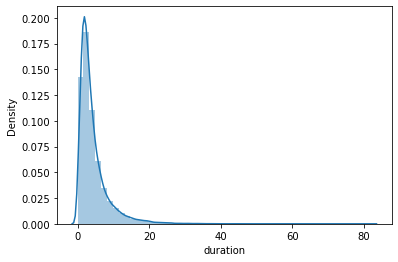

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


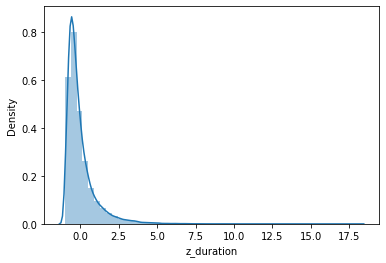

In [82]:
sns.distplot(df['duration'])
plt.show()

sns.distplot(df['z_duration'])
plt.show()

# Measures of Relation
### Correlation: 
It ranges from -1 to 1
- #### Positive Correlation : 1 indicating a perfect positive correlation
- #### No Correlation : 0 indicating no correlation
- #### Negative Correlation : -1 indicating a perfect negative correlation.

In [83]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,z_duration,zscore_duration
age,1.000000,0.024505,0.097709,-0.008973,-0.004379,0.004814,-0.023817,0.001325,-0.004379,-0.004379
salary,0.024505,1.000000,0.055453,0.027763,-0.009994,0.015113,-0.014946,0.014579,-0.009994,-0.009994
balance,0.097709,0.055453,1.000000,0.004447,0.021595,-0.014507,0.003463,0.016690,0.021595,0.021595
day,-0.008973,0.027763,0.004447,1.000000,-0.030315,0.162564,-0.093178,-0.051783,-0.030315,-0.030315
duration,-0.004379,-0.009994,0.021595,-0.030315,1.000000,-0.084419,-0.001714,0.001148,1.000000,1.000000
campaign,0.004814,0.015113,-0.014507,0.162564,-0.084419,1.000000,-0.088583,-0.032776,-0.084419,-0.084419
pdays,-0.023817,-0.014946,0.003463,-0.093178,-0.001714,-0.088583,1.000000,0.454735,-0.001714,-0.001714
previous,0.001325,0.014579,0.016690,-0.051783,0.001148,-0.032776,0.454735,1.000000,0.001148,0.001148
z_duration,-0.004379,-0.009994,0.021595,-0.030315,1.000000,-0.084419,-0.001714,0.001148,1.000000,1.000000
zscore_duration,-0.004379,-0.009994,0.021595,-0.030315,1.000000,-0.084419,-0.001714,0.001148,1.000000,1.000000


- Correlation between age and salary is very weak (0.024505), even for other colums as well is very weak, whereas
- The correlation between pdays and previous is moderately strong (0.454735) i.e (45%).
- The diagonal values, where each variable is compared to itself, are all 1 as they represent the correlation of the variable with itself which is perfect.

<AxesSubplot:>

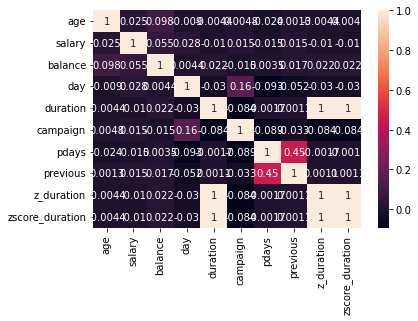

In [84]:
sns.heatmap(df.corr(), annot=True)

### Chi Square Test:
- Finding the independency or dependency about the features


- H0 : Both are independent variable.
- H1 : Both are dependent variables.

In [157]:
def relations_chi(data,col,col1):
    ct = pd.crosstab(data[col],data[col1])
    chi,p_val,dof,exp = stats.chi2_contingency(ct)

    if p_val <= 0.05:
        return 'Reject H0 : {} and {} are dependent variables. . P_Value is {}'.format(col,col1, p_val)
    else:
        return 'Failed Reject H0 : {} and {} are independent variables. P_Value is {}'.format(col,col1, p_val)

In [158]:
for col in df.columns[:]:
    for col1 in df.columns[:]:
        print(relations_chi(df,col,col1))

Reject H0 : age and age are dependent variables. . P_Value is 0.0
Reject H0 : age and salary are dependent variables. . P_Value is 0.0
Reject H0 : age and balance are dependent variables. . P_Value is 0.0
Reject H0 : age and marital are dependent variables. . P_Value is 0.0
Reject H0 : age and targeted are dependent variables. . P_Value is 2.272296923854945e-160
Failed Reject H0 : age and default are independent variables. P_Value is 0.6222109888244394
Reject H0 : age and housing are dependent variables. . P_Value is 0.0
Reject H0 : age and loan are dependent variables. . P_Value is 1.6184616170573488e-31
Reject H0 : age and contact are dependent variables. . P_Value is 0.0
Reject H0 : age and day are dependent variables. . P_Value is 3.5075840333787813e-123
Reject H0 : age and month are dependent variables. . P_Value is 0.0
Reject H0 : age and duration are dependent variables. . P_Value is 0.0
Failed Reject H0 : age and campaign are independent variables. P_Value is 0.9999999999999999

Failed Reject H0 : targeted and duration are independent variables. P_Value is 0.41770691525080555
Failed Reject H0 : targeted and campaign are independent variables. P_Value is 0.23881234643779597
Reject H0 : targeted and pdays are dependent variables. . P_Value is 1.1133508102059267e-11
Reject H0 : targeted and previous are dependent variables. . P_Value is 0.004341136200625625
Reject H0 : targeted and poutcome are dependent variables. . P_Value is 1.5528163250354682e-19
Reject H0 : targeted and response are dependent variables. . P_Value is 1.5072171066789642e-48
Reject H0 : targeted and job_role are dependent variables. . P_Value is 0.0
Reject H0 : targeted and education are dependent variables. . P_Value is 0.0
Failed Reject H0 : targeted and z_duration are independent variables. P_Value is 0.41770691525080555
Failed Reject H0 : targeted and zscore_duration are independent variables. P_Value is 0.41770691525080555
Failed Reject H0 : targeted and new_response are independent variab

Reject H0 : contact and z_duration are dependent variables. . P_Value is 5.300196023733049e-16
Reject H0 : contact and zscore_duration are dependent variables. . P_Value is 5.300196023733049e-16
Failed Reject H0 : contact and new_response are independent variables. P_Value is 1.0
Reject H0 : contact and age_bin are dependent variables. . P_Value is 2.3124675364388137e-190
Reject H0 : day and age are dependent variables. . P_Value is 3.5075840333787813e-123
Reject H0 : day and salary are dependent variables. . P_Value is 9.954252771922933e-140
Failed Reject H0 : day and balance are independent variables. P_Value is 0.8414913475585615
Reject H0 : day and marital are dependent variables. . P_Value is 4.0406092550942043e-29
Reject H0 : day and targeted are dependent variables. . P_Value is 2.3773120488625752e-17
Reject H0 : day and default are dependent variables. . P_Value is 0.040307283566473416
Reject H0 : day and housing are dependent variables. . P_Value is 2.6455951769451076e-257
Rej

Failed Reject H0 : pdays and balance are independent variables. P_Value is 1.0
Reject H0 : pdays and marital are dependent variables. . P_Value is 7.767299098755932e-05
Reject H0 : pdays and targeted are dependent variables. . P_Value is 1.1133508102059267e-11
Failed Reject H0 : pdays and default are independent variables. P_Value is 1.0
Reject H0 : pdays and housing are dependent variables. . P_Value is 5.357204980584199e-273
Reject H0 : pdays and loan are dependent variables. . P_Value is 0.0029071366065736995
Reject H0 : pdays and contact are dependent variables. . P_Value is 0.0
Reject H0 : pdays and day are dependent variables. . P_Value is 0.0
Reject H0 : pdays and month are dependent variables. . P_Value is 0.0
Failed Reject H0 : pdays and duration are independent variables. P_Value is 1.0
Failed Reject H0 : pdays and campaign are independent variables. P_Value is 1.0
Reject H0 : pdays and pdays are dependent variables. . P_Value is 0.0
Reject H0 : pdays and previous are depende

Reject H0 : job_role and duration are dependent variables. . P_Value is 0.00045377823789167517
Reject H0 : job_role and campaign are dependent variables. . P_Value is 4.909207992956925e-11
Reject H0 : job_role and pdays are dependent variables. . P_Value is 7.243971912000791e-25
Reject H0 : job_role and previous are dependent variables. . P_Value is 0.00014576006637949648
Reject H0 : job_role and poutcome are dependent variables. . P_Value is 8.986466910106002e-97
Reject H0 : job_role and response are dependent variables. . P_Value is 4.295150940389955e-172
Reject H0 : job_role and job_role are dependent variables. . P_Value is 0.0
Reject H0 : job_role and education are dependent variables. . P_Value is 0.0
Reject H0 : job_role and z_duration are dependent variables. . P_Value is 0.00045377823789167517
Reject H0 : job_role and zscore_duration are dependent variables. . P_Value is 0.00045377823789167517
Failed Reject H0 : job_role and new_response are independent variables. P_Value is 1

Reject H0 : age_bin and age are dependent variables. . P_Value is 0.0
Reject H0 : age_bin and salary are dependent variables. . P_Value is 0.0
Reject H0 : age_bin and balance are dependent variables. . P_Value is 4.0440480817890263e-73
Reject H0 : age_bin and marital are dependent variables. . P_Value is 0.0
Reject H0 : age_bin and targeted are dependent variables. . P_Value is 4.408187721026132e-39
Reject H0 : age_bin and default are dependent variables. . P_Value is 0.0006560533434211465
Reject H0 : age_bin and housing are dependent variables. . P_Value is 0.0
Reject H0 : age_bin and loan are dependent variables. . P_Value is 0.006316450631460736
Reject H0 : age_bin and contact are dependent variables. . P_Value is 2.3124675364388137e-190
Reject H0 : age_bin and day are dependent variables. . P_Value is 1.6770535151918258e-49
Reject H0 : age_bin and month are dependent variables. . P_Value is 5.065184231970002e-211
Failed Reject H0 : age_bin and duration are independent variables. P_

In [162]:
int(4.791044195926574e-12)

0

# Central Limit Theorem:

In [87]:
df2 = df[df['loan'] == 'yes']

In [88]:
df2

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,1.27,1,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455
6,28.0,100000.0,447,single,no,no,yes,yes,unknown,5,...,3.62,1,-1,0,unknown,no,management,tertiary,-0.158993,-0.158991
20,28.0,20000.0,723,married,yes,no,yes,yes,unknown,5,...,4.37,1,-1,0,unknown,no,blue-collar,secondary,0.015732,0.015731
22,32.0,20000.0,23,single,yes,no,yes,yes,unknown,5,...,2.67,1,-1,0,unknown,no,blue-collar,primary,-0.380310,-0.380306
24,40.0,55000.0,0,married,yes,no,yes,yes,unknown,5,...,3.02,1,-1,0,unknown,no,retired,primary,-0.298772,-0.298769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45122,40.0,120000.0,262,single,no,no,yes,yes,unknown,26,...,0.28,1,-1,0,unknown,no,entrepreneur,tertiary,-0.937099,-0.937089
45151,47.0,100000.0,311,single,no,no,yes,yes,cellular,9,...,4.25,3,378,2,failure,no,management,tertiary,-0.012224,-0.012224
45153,64.0,55000.0,2059,married,yes,no,no,yes,cellular,9,...,5.43,1,95,1,other,no,retired,tertiary,0.262675,0.262673
45194,59.0,100000.0,138,married,yes,no,yes,yes,cellular,16,...,2.70,2,187,5,failure,no,management,tertiary,-0.373321,-0.373317


In [89]:
df3 = df[df['response'] == 'yes']
df3

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration
83,59.0,50000.0,2343,married,yes,no,yes,no,unknown,5,...,17.37,1,-1,0,unknown,yes,admin.,secondary,3.044288,3.044255
86,56.0,50000.0,45,married,yes,no,no,no,unknown,5,...,24.45,1,-1,0,unknown,yes,admin.,secondary,4.693687,4.693635
87,41.0,60000.0,1270,married,yes,no,yes,no,unknown,5,...,23.15,1,-1,0,unknown,yes,technician,secondary,4.390831,4.390783
129,55.0,70000.0,2476,married,yes,no,yes,no,unknown,5,...,9.65,1,-1,0,unknown,yes,services,secondary,1.245792,1.245778
168,54.0,50000.0,184,married,yes,no,no,no,unknown,5,...,11.22,2,-1,0,unknown,yes,admin.,tertiary,1.611548,1.611530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73.0,55000.0,2850,married,yes,no,no,no,cellular,17,...,5.00,1,40,8,failure,yes,retired,secondary,0.162500,0.162498
45205,25.0,60000.0,505,single,yes,no,no,yes,cellular,17,...,6.43,2,-1,0,unknown,yes,technician,secondary,0.495641,0.495636
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,16.28,3,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,...,7.60,2,-1,0,unknown,yes,retired,primary,0.768211,0.768203


In [90]:
def clt(data,col,N,n):
    pop_mean = data[col].mean()
    sample_means = []
    for i in range(N):
        sample_means.append(data[col].sample(n).mean())
    mean_sample_means = np.mean(sample_means)
    print('population mean of {} column is {}'.format(col, pop_mean))
    print('mean of sample means of {} column is {}'.format(col, mean_sample_means))
    sns.histplot(sample_means, kde=True)
    plt.show()

population mean of duration column is 8.956033667486246
mean of sample means of duration column is 8.957363310000002


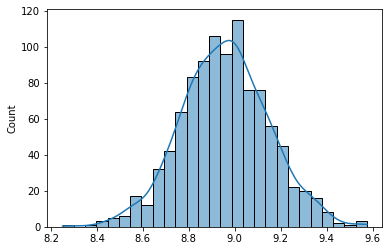

In [91]:
clt(df3,'duration', 1000,1000)

population mean of age column is 41.666162284849634
mean of sample means of age column is 41.651825


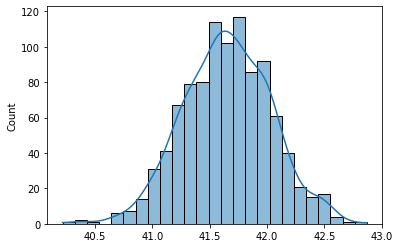

In [143]:
clt(df3,'age', 1000,1000)

population mean of duration column is 4.302472499501982
mean of sample means of duration column is 4.301657069999999


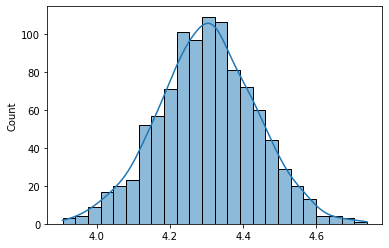

In [166]:
clt(df,'duration', 1000,1000)

population mean of salary column is 57005.046369048934
mean of sample means of salary column is 57003.5648


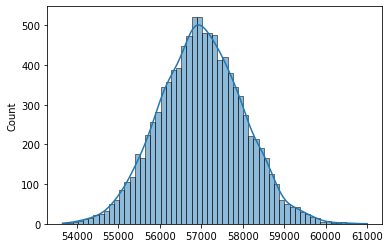

In [168]:
clt(df,'salary', 10000,1000)

## CrossTab for Object

In [92]:
@interact_manual
def groupby(col1 = df.select_dtypes('object').columns,
           col2 = df.select_dtypes('object').columns):
    ct = pd.crosstab(df[col1], df[col2], margins=True)
    display(ct)

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

### Simple ML Algorithm based on confitional probabilities:

In [93]:
df_ct = round(pd.crosstab(df['marital'],df['response'],margins=True)/len(df),3)
df_ct

response,no,yes,All
marital,,,
divorced,0.101,0.014,0.115
married,0.541,0.061,0.602
single,0.241,0.042,0.283
All,0.883,0.117,1.000


In [94]:
p_no = df_ct.no.All
p_yes = df_ct.yes.All

p_divorced = df_ct.All.divorced
p_married = df_ct.All.married
p_single = df_ct.All.single
p_no, p_yes, p_divorced, p_married, p_single

(0.883, 0.117, 0.115, 0.602, 0.283)

In [95]:
p_no_divorced = df_ct.no.divorced
p_no_married = df_ct.no.married
p_no_single = df_ct.no.single

p_yes_divorced = df_ct.yes.divorced
p_yes_married = df_ct.yes.married
p_yes_single = df_ct.yes.single
p_no_divorced, p_no_married, p_no_single, p_yes_divorced, p_yes_married, p_yes_single

(0.101, 0.541, 0.241, 0.014, 0.061, 0.042)

In [96]:
p_no_given_divorced = p_no_divorced/p_divorced
p_yes_given_divorced = p_yes_divorced/p_divorced

p_no_given_married = p_no_married/p_married
p_yes_given_married = p_yes_married/p_married

p_no_given_single = p_no_single/p_single
p_yes_given_single = p_yes_single/p_single

p_no_given_divorced, p_yes_given_divorced, p_no_given_married, p_yes_given_married, p_no_given_single, p_yes_given_single 

(0.8782608695652174,
 0.1217391304347826,
 0.898671096345515,
 0.10132890365448505,
 0.8515901060070672,
 0.1484098939929329)

In [97]:
def predic(no, yes):
    if no > yes:
        return 'no'
    else:
        return 'yes'

In [98]:
new = []
for val in df['marital']:
    if val == 'divorced':
        new.append(predic(p_no_given_divorced, p_yes_given_divorced))
    elif val == 'married':
        new.append(predic(p_no_given_married, p_yes_given_married))
    else:
         new.append(predic(p_no_given_single, p_yes_given_single))

In [99]:
df['new_response'] = new
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,...,1,-1,0,unknown,no,management,tertiary,0.011072,0.011072,no
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,1,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251,no
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,1,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455,no
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,1,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884,no
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,1,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,...,3,-1,0,unknown,yes,technician,tertiary,2.790356,2.790325,no
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,...,2,-1,0,unknown,yes,retired,primary,0.768211,0.768203,no
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,...,5,184,3,success,yes,retired,secondary,3.372770,3.372733,no
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,...,4,-1,0,unknown,no,blue-collar,secondary,0.970892,0.970881,no


In [100]:
df.describe(include=['object'])

,marital,targeted,default,housing,loan,contact,month,poutcome,response,job_role,education,new_response
count,45181,45181,45181,45181,45181,45181,45181,45181,45181,45181,45181,45181
unique,3,2,2,2,2,3,13,4,2,12,4,1
top,married,yes,no,yes,no,cellular,may,unknown,no,blue-collar,secondary,no
freq,27195,37067,44366,25112,37943,29267,13738,36935,39894,9727,23189,45181


In [101]:
df['response'].value_counts().to_frame()

,response
no,39894
yes,5287


In [102]:
df['new_response'].value_counts().to_frame()

,new_response
no,45181


In [103]:
new_response_no = len(df['new_response']) - 5287
new_response_no

39894

In [104]:
accuracy_prediction = new_response_no/len(df)*100
accuracy_prediction

88.29817843783891

In [105]:
df.groupby('marital').count()

,age,salary,balance,targeted,default,housing,loan,contact,day,month,...,campaign,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response
marital,,,,,,,,,,,,,,,,,,,,,
divorced,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204,...,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204
married,27195,27195,27195,27195,27195,27195,27195,27195,27195,27195,...,27195,27195,27195,27195,27195,27195,27195,27195,27195,27195
single,12782,12782,12782,12782,12782,12782,12782,12782,12782,12782,...,12782,12782,12782,12782,12782,12782,12782,12782,12782,12782


In [106]:
df['age'].describe()

count    45181.000000
mean        40.934906
std         10.616517
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [107]:
df.isnull().sum()

age                0
salary             0
balance            0
marital            0
targeted           0
default            0
housing            0
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
job_role           0
education          0
z_duration         0
zscore_duration    0
new_response       0
dtype: int64

In [108]:
### Binning 
df['age_bin'] = pd.cut(df['age'],[0,25,50,100],labels=['0-25','25-50','50-100'])

In [109]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,job_role,education,z_duration,zscore_duration,new_response,age_bin
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,management,tertiary,0.011072,0.011072,no,50-100
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,...,-1,0,unknown,no,technician,secondary,-0.415255,-0.415251,no,25-50
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,...,-1,0,unknown,no,entrepreneur,secondary,-0.706463,-0.706455,no,25-50
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,...,-1,0,unknown,no,blue-collar,unknown,-0.645892,-0.645884,no,25-50
4,33.0,0.0,1,single,no,no,no,no,unknown,5,...,-1,0,unknown,no,unknown,unknown,-0.233542,-0.233539,no,25-50


In [110]:
df['duration'].describe()

count    45181.000000
mean         4.302472
std          4.292521
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

In [111]:
pd.cut(df['duration'],10).value_counts(normalize = True)*100

(-0.082, 8.197]     87.762555
(8.197, 16.394]      9.782873
(16.394, 24.591]     1.914522
(24.591, 32.788]     0.389544
(32.788, 40.985]     0.095173
(40.985, 49.182]     0.024347
(49.182, 57.379]     0.024347
(57.379, 65.576]     0.004427
(73.773, 81.97]      0.002213
(65.576, 73.773]     0.000000
Name: duration, dtype: float64

In [112]:
df['age'].agg({'min','mean','median','max'})

max       95.000000
mean      40.934906
median    39.000000
min       18.000000
Name: age, dtype: float64

### Bivariant Analysis

In [113]:
df.groupby('response')['age'].agg({'min','mean','median','max'})

,max,mean,median,min
response,,,,
no,95.0,40.837996,39.0,18.0
yes,95.0,41.666162,38.0,18.0


In [114]:
df.groupby('response')['salary'].agg({'min','mean','median','max'})

,max,mean,median,min
response,,,,
no,120000.0,56770.917933,60000.0,0.0
yes,120000.0,58771.704180,60000.0,0.0


In [115]:
df.groupby('response')['duration'].agg({'min','mean','median','max'})

,max,mean,median,min
response,,,,
no,81.97,3.685754,2.73,0.00
yes,64.68,8.956034,7.10,0.13


In [116]:
df.select_dtypes('number')

,age,salary,balance,day,duration,campaign,pdays,previous,z_duration,zscore_duration
0,58.0,100000.0,2143,5,4.35,1,-1,0,0.011072,0.011072
1,44.0,60000.0,29,5,2.52,1,-1,0,-0.415255,-0.415251
2,33.0,120000.0,2,5,1.27,1,-1,0,-0.706463,-0.706455
3,47.0,20000.0,1506,5,1.53,1,-1,0,-0.645892,-0.645884
4,33.0,0.0,1,5,3.30,1,-1,0,-0.233542,-0.233539
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,17,16.28,3,-1,0,2.790356,2.790325
45207,71.0,55000.0,1729,17,7.60,2,-1,0,0.768211,0.768203
45208,72.0,55000.0,5715,17,18.78,5,184,3,3.372770,3.372733
45209,57.0,20000.0,668,17,8.47,4,-1,0,0.970892,0.970881


In [117]:
df.select_dtypes('object')

,marital,targeted,default,housing,loan,contact,month,poutcome,response,job_role,education,new_response
0,married,yes,no,yes,no,unknown,may,unknown,no,management,tertiary,no
1,single,yes,no,yes,no,unknown,may,unknown,no,technician,secondary,no
2,married,yes,no,yes,yes,unknown,may,unknown,no,entrepreneur,secondary,no
3,married,no,no,yes,no,unknown,may,unknown,no,blue-collar,unknown,no
4,single,no,no,no,no,unknown,may,unknown,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,married,yes,no,no,no,cellular,nov,unknown,yes,technician,tertiary,no
45207,divorced,yes,no,no,no,cellular,nov,unknown,yes,retired,primary,no
45208,married,yes,no,no,no,cellular,nov,success,yes,retired,secondary,no
45209,married,yes,no,no,no,telephone,nov,unknown,no,blue-collar,secondary,no


In [118]:
df.select_dtypes('number').columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'z_duration', 'zscore_duration'],
      dtype='object')

In [119]:
df.select_dtypes('object').columns

Index(['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'response', 'job_role', 'education', 'new_response'],
      dtype='object')

In [120]:
@interact
def groupby(col1 = df.select_dtypes('object').columns,
           col2 = df.select_dtypes('number').columns):
    return df.groupby(col1)[col2].agg({'min','mean','median','max','count'})

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

In [121]:
pd.crosstab(df['response'],df['marital'], margins=True)

marital,divorced,married,single,All
response,,,,
no,4582,24441,10871,39894
yes,622,2754,1911,5287
All,5204,27195,12782,45181


In [122]:
@interact
def groupby(col1 = df.select_dtypes('object').columns,
           col2 = df.select_dtypes('object').columns):
    return pd.crosstab(df[col1],df[col2])

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

### Single Categorical Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

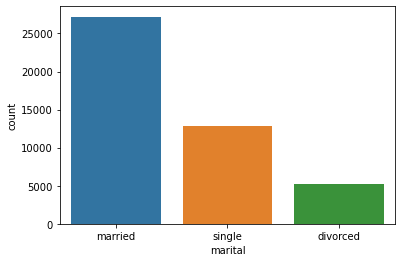

In [123]:
sns.countplot(df['marital'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bin', ylabel='count'>

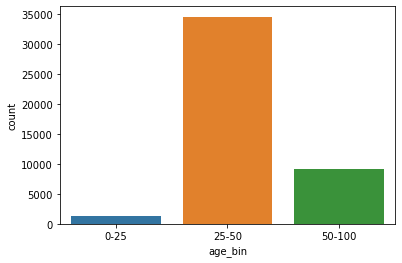

In [124]:
sns.countplot(df['age_bin'])

### Categorical and Categorical Variable

<AxesSubplot:xlabel='marital'>

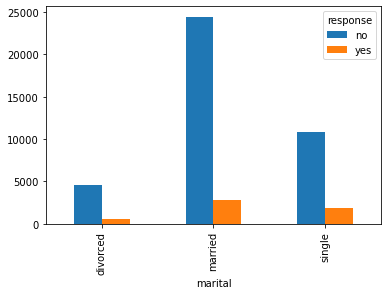

In [125]:
pd.crosstab(df['marital'],df['response']).plot.bar()

<AxesSubplot:xlabel='marital'>

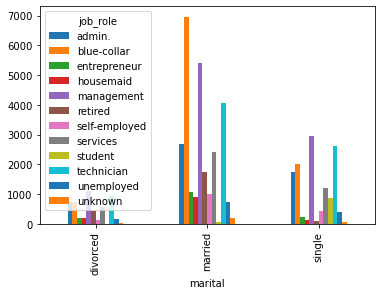

In [126]:
pd.crosstab(df['marital'],df['job_role']).plot.bar()

### Numerical Variable

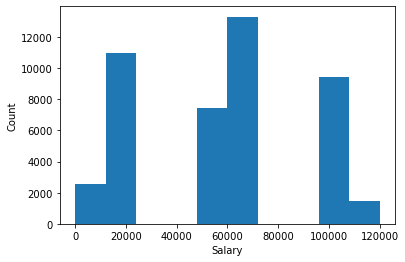

In [127]:
plt.hist(df['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

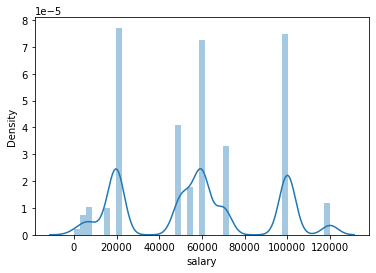

In [128]:
sns.distplot(df['salary'])

### Two Numerical variables

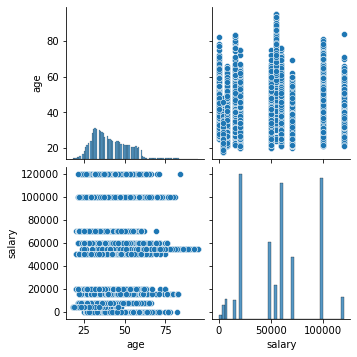

In [129]:
sns.pairplot(df[['age','salary']])

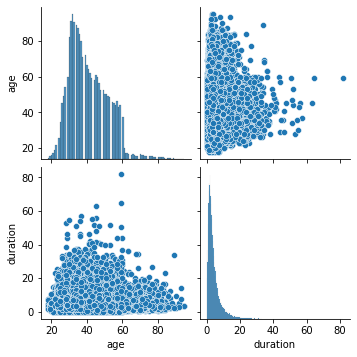

In [130]:
sns.pairplot(df[['age','duration']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='duration'>

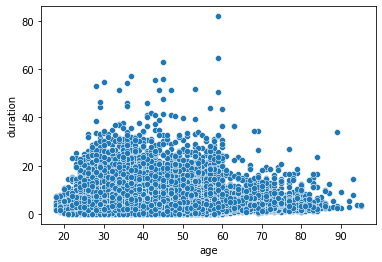

In [131]:
sns.scatterplot(df['age'], df['duration'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='duration'>

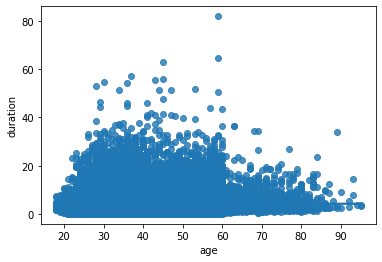

In [132]:
sns.regplot(df['age'], df['duration'])

### One Categorical and one Numerical

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='salary'>

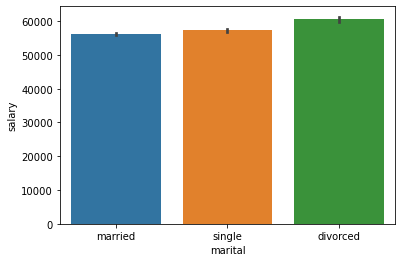

In [133]:
sns.barplot(df['marital'],df['salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='salary'>

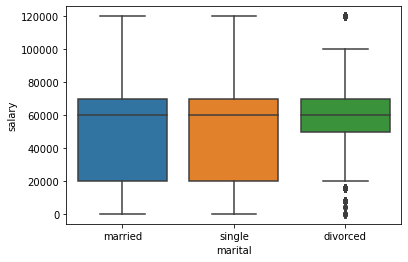

In [134]:
sns.boxplot(df['marital'],df['salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='salary'>

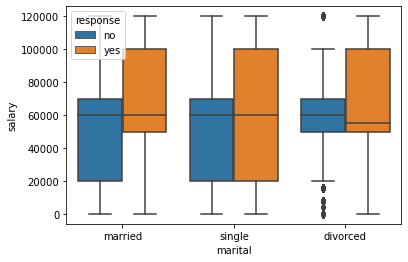

In [135]:
sns.boxplot(df['marital'],df['salary'], hue=df['response'])

In [136]:
@interact_manual
def groupby(col1 = df.select_dtypes('object').columns,
           col2 = df.select_dtypes('number').columns):
    sns.boxplot(df[col1],df[col2], hue=df['response']);

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

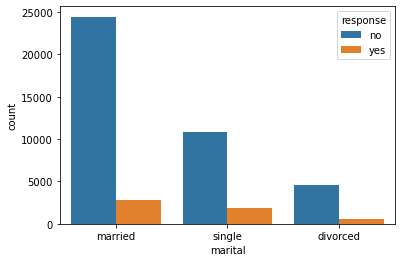

In [137]:
sns.countplot(df['marital'], hue=df['response'])

In [138]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('number').columns):
    sns.scatterplot(df[col1],df[col2], hue=df['response']);

interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'day', 'duration', 'ca…

In [139]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('number').columns):
    sns.jointplot(data=df, x=col1, y=col2, hue=df['response']);

interactive(children=(Dropdown(description='col1', options=('age', 'salary', 'balance', 'day', 'duration', 'ca…